## Multiimage Classificatiom

In [1]:
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential                                # for adding layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout      # this is for applying the process of cnn
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
from numpy import argmax
from keras.preprocessing.image import ImageDataGenerator


import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization


In [2]:
# accessing the images folders
directory = r"/home/webwerks/acne_classification/dataset"
categories = ['Level_0', 'Level_1','Level_2']

# setting a fixed pixel size for all the images
img_size = 300

# creating a list to store image array with it's label
data = []

# read every image, converting and  store it in an array


def preprocess_image():
    for category in categories:
        fldr = os.path.join(directory , category)
        # print(fldr) to check the paths of the folders

        # labeling if it is a apple/tomato as 0 1 
        label = categories.index(category)
        print("Labels:",label)

        # looking through all the files inside the folder/dir
        for img in os.listdir(fldr):
            path_img = os.path.join(fldr, img)

            # print(path_img)   #to see the path
            # break
            

            # cv2 will read the image into an array
            arr_img = cv2.imread(path_img)
            arr_img = cv2.cvtColor(arr_img, cv2.COLOR_BGR2RGB)

            # using resize to change size of all images
            arr_img = cv2.resize(arr_img, (img_size, img_size))
            # print(arr_img)
            arr_img = arr_img / 255.

            # plt.imshow(arr_img)     #to display image
            # break

            data.append([arr_img, label])


preprocess_image()
        

Labels: 0
Labels: 1
Labels: 2


In [3]:
print("Total Number of images: ", len(data))

# to shuffle the images, if not model will check all images first
random.shuffle(data)

# displaying the  1st element of data
#print("data[0]: ", data[0])

# creating lists for storing features and labels separately
X = []
y = []
for features, labels in data:
    X.append(features)
    y.append(labels)

# converting lists to numpy arrays
X = np.array(X)
y = tf.keras.utils.to_categorical(
    y, num_classes=None, dtype='float32')


print("The length of X and y are :", len(X), len(y))   # checking the lengths to see if they are same
print("Shape of X", X.shape)
print("Array y:", y)
print("Shape of y", y.shape)

Total Number of images:  999
The length of X and y are : 999 999
Shape of X (999, 300, 300, 3)
Array y: [[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]
Shape of y (999, 3)


# Data Augmentation

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
train_datagen = ImageDataGenerator(rotation_range=45,
    width_shift_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
train_datagen.fit(X_train)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32)

## Model

In [5]:
model3_drop_norm = Sequential()
model3_drop_norm.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(300, 300, 3)))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(Dropout(0.2))

model3_drop_norm.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(MaxPooling2D((2, 2)))
model3_drop_norm.add(Dropout(0.2))

model3_drop_norm.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(Dropout(0.4))
model3_drop_norm.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(MaxPooling2D((2, 2)))
model3_drop_norm.add(Dropout(0.4))
model3_drop_norm.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(Dropout(0.4))
model3_drop_norm.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(MaxPooling2D((2, 2)))
model3_drop_norm.add(Dropout(0.4))
model3_drop_norm.add(Flatten())
model3_drop_norm.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(Dropout(0.2))
model3_drop_norm.add(Dense(3, activation='softmax'))

model3_drop_norm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3_drop_norm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 300, 300, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 300, 300, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 300, 300, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 150, 150, 32)      0

In [8]:
# callback = EarlyStopping(monitor="val_loss",
#                         min_delta=0.00001,
#                         patience=5,
#                         verbose=1,
#                         mode='auto',
#                         baseline=None,
#                         restore_best_weights=False)

In [ ]:
history = model3_drop_norm.fit(
        X_train,y_train,
        epochs = 100,batch_size= 32,
        validation_data = (X_test, y_test)
        )

Epoch 1/100
25/25 [==============================] - 18s 344ms/step - loss: 1.4019 - accuracy: 0.3892 - val_loss: 2.1490 - val_accuracy: 0.3950
Epoch 2/100
25/25 [==============================] - 5s 208ms/step - loss: 1.0669 - accuracy: 0.4631 - val_loss: 12.5490 - val_accuracy: 0.4750
Epoch 3/100
25/25 [==============================] - 5s 208ms/step - loss: 0.9690 - accuracy: 0.5156 - val_loss: 27.0991 - val_accuracy: 0.4750
Epoch 4/100
25/25 [==============================] - 5s 210ms/step - loss: 0.9255 - accuracy: 0.5382 - val_loss: 33.1785 - val_accuracy: 0.4750
Epoch 5/100
25/25 [==============================] - 5s 208ms/step - loss: 0.8564 - accuracy: 0.5945 - val_loss: 38.2840 - val_accuracy: 0.4750
Epoch 6/100
25/25 [==============================] - 5s 211ms/step - loss: 0.8406 - accuracy: 0.6108 - val_loss: 31.8740 - val_accuracy: 0.4750
Epoch 7/100
25/25 [==============================] - 5s 209ms/step - loss: 0.7686 - accuracy: 0.6583 - val_loss: 4.0427 - val_accuracy: 

Epoch 58/100
25/25 [==============================] - 5s 216ms/step - loss: 0.0488 - accuracy: 0.9862 - val_loss: 39.6780 - val_accuracy: 0.3000
Epoch 59/100
25/25 [==============================] - 5s 215ms/step - loss: 0.0477 - accuracy: 0.9825 - val_loss: 38.0430 - val_accuracy: 0.2900
Epoch 60/100
25/25 [==============================] - 5s 215ms/step - loss: 0.0599 - accuracy: 0.9737 - val_loss: 53.5841 - val_accuracy: 0.3500
Epoch 61/100
25/25 [==============================] - 5s 213ms/step - loss: 0.0560 - accuracy: 0.9775 - val_loss: 127.8777 - val_accuracy: 0.2500
Epoch 62/100
25/25 [==============================] - 5s 213ms/step - loss: 0.0509 - accuracy: 0.9825 - val_loss: 133.4906 - val_accuracy: 0.2550
Epoch 63/100
25/25 [==============================] - 5s 220ms/step - loss: 0.0474 - accuracy: 0.9850 - val_loss: 57.5125 - val_accuracy: 0.2450
Epoch 64/100
25/25 [==============================] - 6s 241ms/step - loss: 0.0331 - accuracy: 0.9912 - val_loss: 37.4109 - val_

In [14]:
model3_drop_norm.save("acne_classification_v2.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


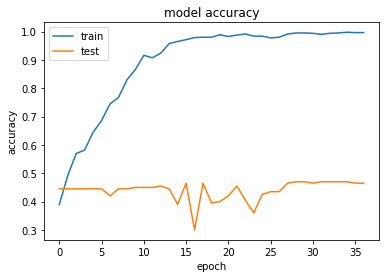

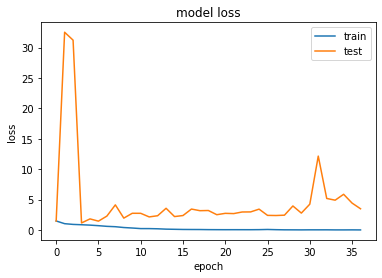

In [9]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()
            
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

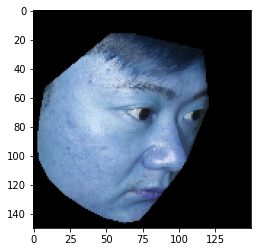

In [4]:
plt.imshow(X[998])

In [5]:
X_train = X[0:900]
X_val = X[900:]
y_train = y[0:900]
y_val = y[900:]


In [6]:
X_train[0].shape

(150, 150, 3)

In [8]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [25]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=X_train[0].shape))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 146, 146, 30)      8670      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 73, 73, 30)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 71, 71, 30)        8130      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 35, 35, 30)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 33, 33, 30)        8130      
_________________________________________________________________
flatten_4 (Flatten)          (None, 32670)            

In [27]:
history = model.fit(X_train,y_train,emodel.add(Dense(128, activation = activation, kernel_initializer = 'he_uniform'))pochs=25)

Epoch 1/25
29/29 [==============================] - 26s 881ms/step - loss: 9.0069e-08 - acc: 0.3878
Epoch 2/25
29/29 [==============================] - 26s 881ms/step - loss: 9.0069e-08 - acc: 0.3878
Epoch 3/25
29/29 [==============================] - 26s 888ms/step - loss: 9.0069e-08 - acc: 0.3878
Epoch 4/25
29/29 [==============================] - 26s 890ms/step - loss: 9.0069e-08 - acc: 0.3878
Epoch 5/25
29/29 [==============================] - 26s 884ms/step - loss: 9.0069e-08 - acc: 0.3878
Epoch 6/25
29/29 [==============================] - 26s 885ms/step - loss: 9.0069e-08 - acc: 0.3878
Epoch 7/25
29/29 [==============================] - 26s 891ms/step - loss: 9.0069e-08 - acc: 0.3878
Epoch 8/25
29/29 [==============================] - 26s 895ms/step - loss: 9.0069e-08 - acc: 0.3878
Epoch 9/25
29/29 [==============================] - 26s 913ms/step - loss: 9.0069e-08 - acc: 0.3878
Epoch 10/25
29/29 [==============================] - 26s 902ms/step - loss: 9.0069e-08 - acc: 0.3878

In [8]:
cnn_classifier_model = Sequential()
""" to add a convolution layer(number of feature detectors,size of feature detector(matrix),activation)"""
cnn_classifier_model.add(Conv2D(512, (3, 3), activation='relu'))
cnn_classifier_model.add(MaxPooling2D((2, 2)))


# repeating above step
cnn_classifier_model.add(Conv2D(256, (3, 3), activation='relu'))
cnn_classifier_model.add(MaxPooling2D((2, 2)))

cnn_classifier_model.add(Flatten())
""" Dense(number of neurons in hidden layer,(100,100,3))"""
# cnn_classifier_model.add(Dense(512, activation='relu'))
# cnn_classifier_model.add(BatchNormalization())
# cnn_classifier_model.add(Dropout(0.2))

# cnn_classifier_model.add(Dense(64, activation='relu'))
# cnn_classifier_model.add(BatchNormalization())
# cnn_classifier_model.add(Dropout(0.2))

# cnn_classifier_model.add(Dense(32, activation='relu'))
# cnn_classifier_model.add(BatchNormalization())
# cnn_classifier_model.add(Dropout(0.2))

# cnn_classifier_model.add(Dense(16, activation='relu'))
# cnn_classifier_model.add(BatchNormalization())
# cnn_classifier_model.add(Dropout(0.2))
# # not the output layer

"""Dense(no.of output neurons [paper ,rock scissor so 3],..)"""
cnn_classifier_model.add(Dense(3, activation='softmax'))

# compiling the model

cnn_classifier_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
gpus

[]

In [47]:
history = cnn_classifier_model.fit(X, y, epochs=50, batch_size=32, validation_split=0.1, verbose=1, callbacks=callback)
print(history.history)

Epoch 1/50
29/29 [==============================] - 251s 9s/step - loss: 0.0000e+00 - accuracy: 0.4727 - val_loss: 0.0000e+00 - val_accuracy: 0.4800
Epoch 2/50
12/29 [===========>..................] - ETA: 2:25 - loss: 0.0000e+00 - accuracy: 0.4766

KeyboardInterrupt: 

In [32]:
cnn_classifier_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 60)      1680      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 60)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 60)        32460     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 60)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 77760)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               9953408   
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)              

In [33]:
cnn_classifier_model.get_weights()

[array([[[[ 0.38246554,  0.2092794 , -0.05778319, ...,  0.36949885,
            0.37134576,  0.3860922 ],
          [ 0.20005885,  0.2012011 , -0.05387921, ...,  0.3260526 ,
            0.35706893,  0.35041773],
          [ 0.3398421 ,  0.34168792,  0.06523543, ...,  0.21967982,
            0.26055768,  0.2826368 ]],
 
         [[ 0.32865706,  0.22243993,  0.05880194, ...,  0.32282266,
            0.27682003,  0.351619  ],
          [ 0.3321139 ,  0.21583094, -0.05709548, ...,  0.20381968,
            0.22725505,  0.20566311],
          [ 0.32513204,  0.2447548 , -0.0466975 , ...,  0.3693574 ,
            0.36247197,  0.28223547]],
 
         [[ 0.2696279 ,  0.22720014, -0.01458058, ...,  0.31237885,
            0.32478943,  0.22198507],
          [ 0.28830978,  0.34866092,  0.05181421, ...,  0.22168535,
            0.38145947,  0.19761907],
          [ 0.35165563,  0.3486725 , -0.06358427, ...,  0.34112918,
            0.36011213,  0.25937074]]],
 
 
        [[[ 0.22889033,  0.2627843

In [20]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()
            
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

dict_keys(['loss', 'acc'])


KeyError: 'accuracy'